In [ ]:
# Cell 1 — Install & imports (run first)
!pip install --quiet missingno openpyxl wordcloud

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
from datetime import datetime

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# create folder to save images for report
os.makedirs("images", exist_ok=True)


In [ ]:
# Cell 2 — Load dataset directly from Hugging Face

!pip install --quiet datasets

from datasets import load_dataset
import pandas as pd

# Load dataset
# ⚠️ Note: If it's gated/private, run: !huggingface-cli login  (paste your HF token)
dataset = load_dataset("electricsheepafrica/nigerian_retail_and_ecommerce_purchase_history_records")

# Hugging Face datasets are usually dict-like: train/test/split
print("Available splits:", list(dataset.keys()))

# Convert to pandas DataFrame
df = dataset[list(dataset.keys())[0]].to_pandas()

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head(10))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/nigerian_retail_and_ecommerce_purch(…):   0%|          | 0.00/31.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Available splits: ['train']
✅ Dataset loaded successfully!
Shape: (1000000, 14)


,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,city,is_repeat_purchase,discount_applied,discount_amount_ngn
0,PUR0000000,CUST738296,2023-03-07,Sports & Outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,Abuja,True,True,0.0
1,PUR0000001,CUST566795,2024-06-17,Health,Supplements,2,297407.47,594814.94,debit_card,mobile_app,Lagos,False,False,0.0
2,PUR0000002,CUST238819,2024-06-13,Baby & Kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,Kaduna,False,True,0.0
3,PUR0000003,CUST974466,2023-09-27,Fashion,Jewelry,2,235910.56,471821.12,cash_on_delivery,online,Kano,True,False,0.0
4,PUR0000004,CUST686049,2024-05-16,Health,Supplements,2,327559.25,655118.50,debit_card,in_store,Aba,False,False,0.0
5,PUR0000005,CUST140765,2023-12-11,Groceries,Beverages,3,219949.35,659848.05,cash_on_delivery,online,Ilorin,False,False,0.0
6,PUR0000006,CUST235402,2024-08-04,Books & Media,Educational,3,309542.21,928626.63,cash_on_delivery,mobile_app,Kano,True,False,0.0
7,PUR0000007,CUST400595,2023-05-27,Fashion,Bags,5,106015.55,530077.75,bank_transfer,online,Enugu,True,False,0.0
8,PUR0000008,CUST440519,2023-01-04,Health,Medical Devices,1,99156.76,99156.76,debit_card,in_store,Benin City,True,False,0.0
9,PUR0000009,CUST280049,2023-08-01,Automotive,Parts,2,282876.65,565753.30,bank_transfer,mobile_app,Kano,False,False,0.0


In [ ]:
# Cell 3 — Structure, dtype, sample counts
print("=== Basic Info ===")
display(df.info())

print("\n=== Shape ===")
print("Rows:", df.shape[0], "Columns:", df.shape[1])

print("\n=== Columns and dtypes ===")
display(pd.DataFrame(df.dtypes, columns=['dtype']))

print("\n=== First 10 rows sample ===")
display(df.head(10))

print("\n=== Unique value counts (top 10 cols) ===")
for c in df.columns[:10]:
    try:
        print(c, "-> unique:", df[c].nunique())
    except:
        pass


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   purchase_id          1000000 non-null  object 
 1   customer_id          1000000 non-null  object 
 2   purchase_date        1000000 non-null  object 
 3   product_category     1000000 non-null  object 
 4   product_subcategory  1000000 non-null  object 
 5   quantity             1000000 non-null  int64  
 6   unit_price_ngn       1000000 non-null  float64
 7   total_amount_ngn     1000000 non-null  float64
 8   payment_method       1000000 non-null  object 
 9   channel              1000000 non-null  object 
 10  city                 1000000 non-null  object 
 11  is_repeat_purchase   1000000 non-null  bool   
 12  discount_applied     1000000 non-null  bool   
 13  discount_amount_ngn  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1)

None


=== Shape ===
Rows: 1000000 Columns: 14

=== Columns and dtypes ===


,dtype
purchase_id,object
customer_id,object
purchase_date,object
product_category,object
product_subcategory,object
quantity,int64
unit_price_ngn,float64
total_amount_ngn,float64
payment_method,object
channel,object



=== First 10 rows sample ===


,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,city,is_repeat_purchase,discount_applied,discount_amount_ngn
0,PUR0000000,CUST738296,2023-03-07,Sports & Outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,Abuja,True,True,0.0
1,PUR0000001,CUST566795,2024-06-17,Health,Supplements,2,297407.47,594814.94,debit_card,mobile_app,Lagos,False,False,0.0
2,PUR0000002,CUST238819,2024-06-13,Baby & Kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,Kaduna,False,True,0.0
3,PUR0000003,CUST974466,2023-09-27,Fashion,Jewelry,2,235910.56,471821.12,cash_on_delivery,online,Kano,True,False,0.0
4,PUR0000004,CUST686049,2024-05-16,Health,Supplements,2,327559.25,655118.50,debit_card,in_store,Aba,False,False,0.0
5,PUR0000005,CUST140765,2023-12-11,Groceries,Beverages,3,219949.35,659848.05,cash_on_delivery,online,Ilorin,False,False,0.0
6,PUR0000006,CUST235402,2024-08-04,Books & Media,Educational,3,309542.21,928626.63,cash_on_delivery,mobile_app,Kano,True,False,0.0
7,PUR0000007,CUST400595,2023-05-27,Fashion,Bags,5,106015.55,530077.75,bank_transfer,online,Enugu,True,False,0.0
8,PUR0000008,CUST440519,2023-01-04,Health,Medical Devices,1,99156.76,99156.76,debit_card,in_store,Benin City,True,False,0.0
9,PUR0000009,CUST280049,2023-08-01,Automotive,Parts,2,282876.65,565753.30,bank_transfer,mobile_app,Kano,False,False,0.0



=== Unique value counts (top 10 cols) ===
purchase_id -> unique: 1000000
customer_id -> unique: 603488
purchase_date -> unique: 701
product_category -> unique: 10
product_subcategory -> unique: 46
quantity -> unique: 5
unit_price_ngn -> unique: 989914
total_amount_ngn -> unique: 995587
payment_method -> unique: 6
channel -> unique: 5


In [ ]:
# Cell 4 — Missing values, duplicates, and save a small report
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
display(missing_df.head(20))

print("\nDuplicate rows:", df.duplicated().sum())

# Save missing info for your report
missing_df.to_csv("images/missing_summary.csv")


,missing_count,missing_percent
purchase_id,0,0.0
customer_id,0,0.0
purchase_date,0,0.0
product_category,0,0.0
product_subcategory,0,0.0
quantity,0,0.0
unit_price_ngn,0,0.0
total_amount_ngn,0,0.0
payment_method,0,0.0
channel,0,0.0



Duplicate rows: 0


In [ ]:
# Cell 5 — Normalize column names and detect key fields
df.columns = [c.strip().replace(' ', '_').replace('-', '_') for c in df.columns]

# heuristic detection of typical names
possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
possible_customer_cols = [c for c in df.columns if 'customer' in c.lower() or 'user' in c.lower() or 'buyer' in c.lower()]
possible_price_cols = [c for c in df.columns if 'price' in c.lower() or 'amount' in c.lower() or 'total' in c.lower()]
possible_qty_cols = [c for c in df.columns if 'quantity' in c.lower() or 'qty' in c.lower()]
possible_product_cols = [c for c in df.columns if 'product' in c.lower() or 'item' in c.lower() or 'stock' in c.lower()]
possible_region_cols = [c for c in df.columns if 'country' in c.lower() or 'region' in c.lower() or 'city' in c.lower()]

print("Date columns guess:", possible_date_cols)
print("Customer columns guess:", possible_customer_cols)
print("Price/Amount columns guess:", possible_price_cols)
print("Quantity columns guess:", possible_qty_cols)
print("Product columns guess:", possible_product_cols)
print("Region columns guess:", possible_region_cols)


Date columns guess: ['purchase_date']
Customer columns guess: ['customer_id']
Price/Amount columns guess: ['unit_price_ngn', 'total_amount_ngn', 'discount_amount_ngn']
Quantity columns guess: ['quantity']
Product columns guess: ['product_category', 'product_subcategory']
Region columns guess: ['city']


In [ ]:
# Cell 6 — Convert detected date column to datetime & create TotalAmount
# Please update these names if detection is wrong
date_col = possible_date_cols[0] if possible_date_cols else None
cust_col = possible_customer_cols[0] if possible_customer_cols else None
price_col = possible_price_cols[0] if possible_price_cols else None
qty_col = possible_qty_cols[0] if possible_qty_cols else None

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    print("Converted", date_col, "to datetime. Nulls:", df[date_col].isnull().sum())
else:
    print("No date column detected automatically. Please set date_col variable manually.")

# ensure numeric price and qty
if price_col:
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
if qty_col:
    df[qty_col] = pd.to_numeric(df[qty_col], errors='coerce')

# TotalAmount creation
if 'TotalAmount' not in df.columns and price_col and qty_col:
    df['TotalAmount'] = df[price_col].fillna(0) * df[qty_col].fillna(0)
    print("Created TotalAmount column.")
else:
    print("TotalAmount exists or cannot be created without price & qty.")

display(df[[date_col, cust_col, price_col, qty_col, 'TotalAmount']].head())


Converted purchase_date to datetime. Nulls: 0
Created TotalAmount column.


,purchase_date,customer_id,unit_price_ngn,quantity,TotalAmount
0,2023-03-07,CUST738296,136977.89,5,684889.45
1,2024-06-17,CUST566795,297407.47,2,594814.94
2,2024-06-13,CUST238819,283936.94,5,1419684.70
3,2023-09-27,CUST974466,235910.56,2,471821.12
4,2024-05-16,CUST686049,327559.25,2,655118.50


In [ ]:
# Cell 7 — Descriptive stats for key numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[num_cols].describe().T.round(2))

# variance
variance = df[num_cols].var().round(2)
display(pd.DataFrame(variance, columns=['variance']).sort_values('variance', ascending=False).head(20))

# Save describe as csv for report
df[num_cols].describe().T.to_csv("images/descriptive_statistics.csv")


,count,mean,std,min,25%,50%,75%,max
quantity,1000000.0,3.00,1.41,1.00,2.00,3.00,4.00,5.00
unit_price_ngn,1000000.0,250331.59,144137.97,1000.42,125334.87,250244.19,375304.00,499999.96
total_amount_ngn,1000000.0,751174.99,595179.87,1001.12,274173.83,585398.77,1119118.08,2499993.45
discount_amount_ngn,1000000.0,11288.07,25006.27,0.00,0.00,0.00,6026.16,149664.92
TotalAmount,1000000.0,751174.99,595179.87,1001.12,274173.83,585398.77,1119118.08,2499993.45


,variance
total_amount_ngn,3.542391e+11
TotalAmount,3.542391e+11
unit_price_ngn,2.077575e+10
discount_amount_ngn,6.253134e+08
quantity,2.000000e+00


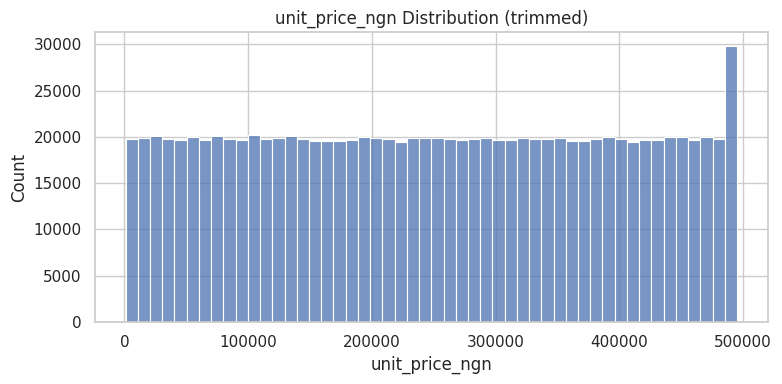

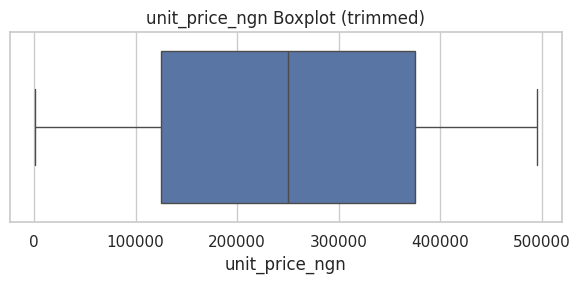

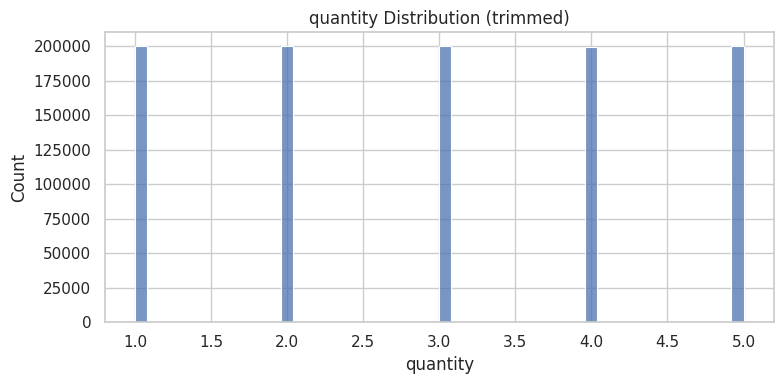

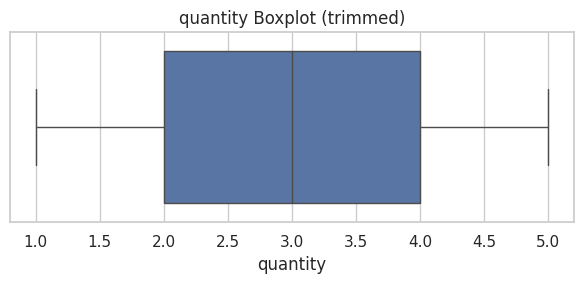

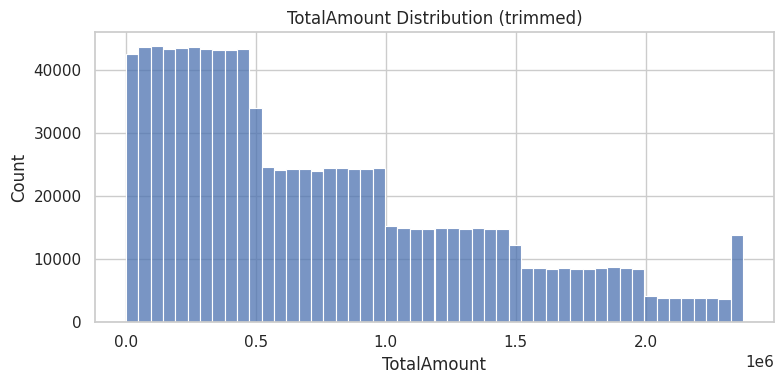

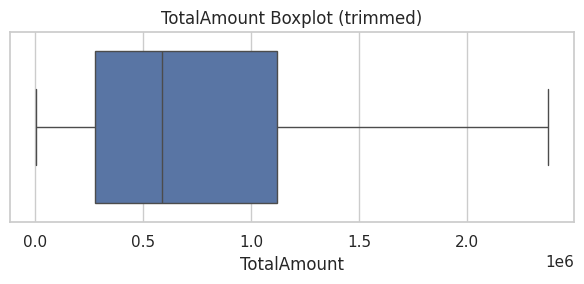

In [ ]:
# Cell 8 — Histograms and Boxplots for important numeric features
plot_cols = []
if price_col: plot_cols.append(price_col)
if qty_col: plot_cols.append(qty_col)
if 'TotalAmount' in df.columns: plot_cols.append('TotalAmount')

for col in plot_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna().clip(upper=df[col].quantile(0.99)), bins=50)
    plt.title(f'{col} Distribution (trimmed)')
    plt.xlabel(col)
    plt.tight_layout()
    fname = f"images/hist_{col}.png"
    plt.savefig(fname, dpi=150)
    plt.show()

    # boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col].dropna().clip(upper=df[col].quantile(0.99)))
    plt.title(f'{col} Boxplot (trimmed)')
    plt.tight_layout()
    fname2 = f"images/box_{col}.png"
    plt.savefig(fname2, dpi=150)
    plt.show()


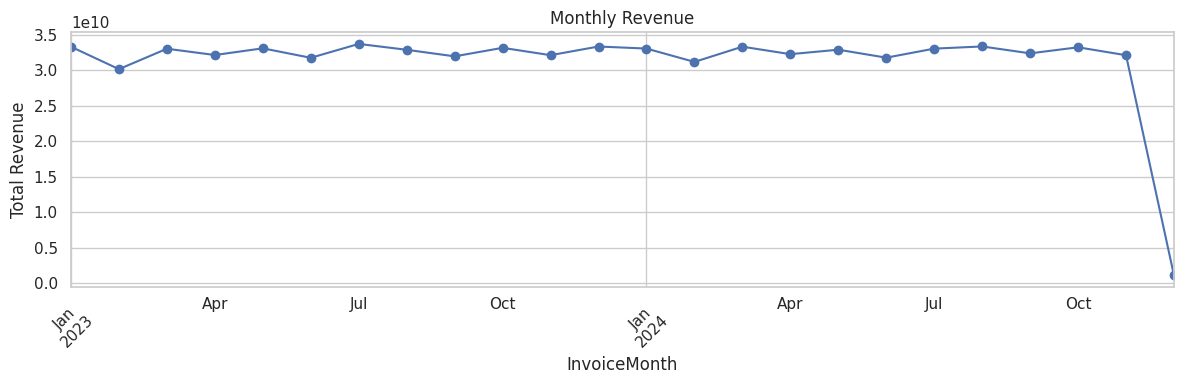

In [ ]:
# Cell 9 — Time-series analysis (monthly sales)
if date_col and 'TotalAmount' in df.columns:
    df['InvoiceMonth'] = df[date_col].dt.to_period('M').dt.to_timestamp()
    monthly = df.groupby('InvoiceMonth')['TotalAmount'].sum().sort_index()
    plt.figure(figsize=(12,4))
    monthly.plot(marker='o')
    plt.title('Monthly Revenue')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("images/monthly_revenue.png", dpi=150)
    plt.show()
else:
    print("Monthly timeseries skipped: date or TotalAmount missing.")


Analyzing Payment Method column: payment_method



,Count,Percentage
payment_method,,
cash_on_delivery,450126,45.01
bank_transfer,250290,25.03
debit_card,149982,15.00
ussd,79999,8.00
mobile_money,49991,5.00
credit_card,19612,1.96


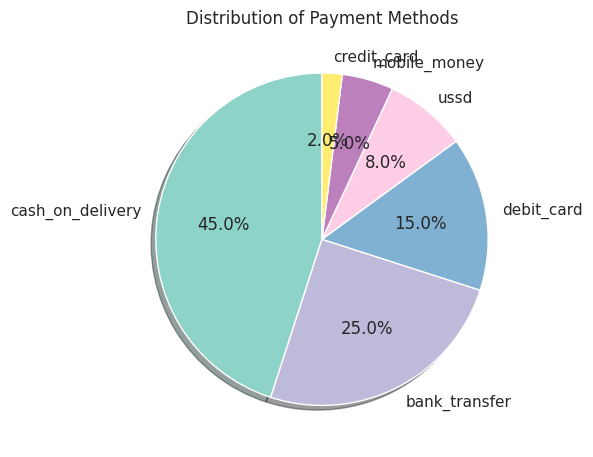

/tmp/ipython-input-4215203174.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_percent.index, y=payment_percent.values, palette='pastel')


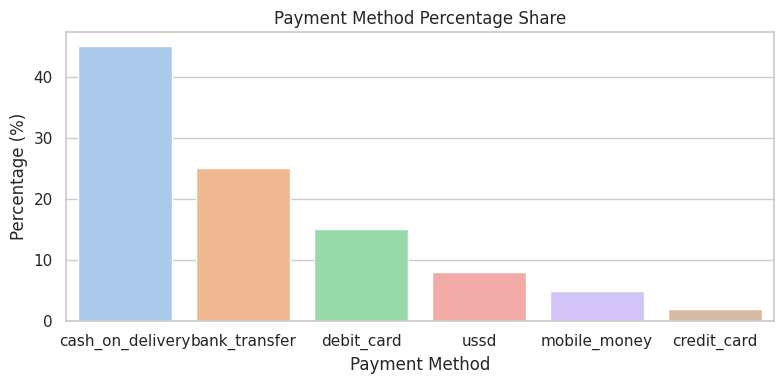

In [ ]:
# Cell — Payment Method Analysis
# Detect the column automatically
payment_col = None
for c in df.columns:
    if 'payment' in c.lower() or 'method' in c.lower():
        payment_col = c
        break

if payment_col:
    print(f"Analyzing Payment Method column: {payment_col}\n")

    # Calculate counts and percentages
    payment_stats = df[payment_col].value_counts(dropna=False)
    payment_percent = (payment_stats / len(df) * 100).round(2)

    payment_summary = pd.DataFrame({
        'Count': payment_stats,
        'Percentage': payment_percent
    })
    display(payment_summary)

    # Save to CSV for report if needed
    #payment_summary.to_csv("images/payment_method_summary.csv")

    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    payment_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, cmap='Set3')
    plt.title('Distribution of Payment Methods')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig("images/payment_method_pie.png", dpi=150)
    plt.show()

    # --- Bar Chart ---
    plt.figure(figsize=(8,4))
    sns.barplot(x=payment_percent.index, y=payment_percent.values, palette='pastel')
    plt.title('Payment Method Percentage Share')
    plt.xlabel('Payment Method')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.savefig("images/payment_method_bar.png", dpi=150)
    plt.show()

else:
    print("No column containing 'payment' or 'method' found. Please specify manually if present.")


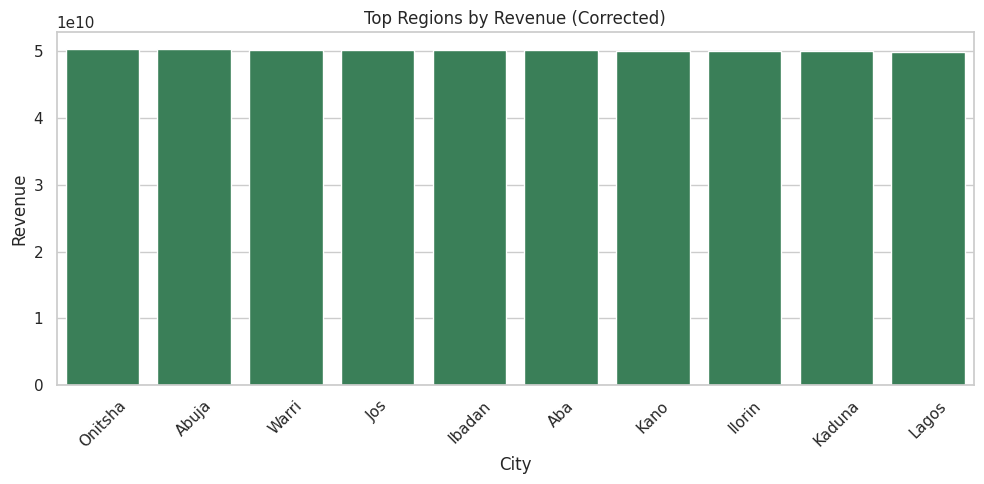

,city,TotalAmount,Percentage
12,Onitsha,5.034299e+10,10.03
2,Abuja,5.031225e+10,10.03
14,Warri,5.028235e+10,10.02
8,Jos,5.027508e+10,10.02
6,Ibadan,5.021908e+10,10.01
0,Aba,5.015234e+10,10.00
10,Kano,5.010608e+10,9.99
7,Ilorin,5.006050e+10,9.98
9,Kaduna,5.003501e+10,9.97
11,Lagos,4.998033e+10,9.96


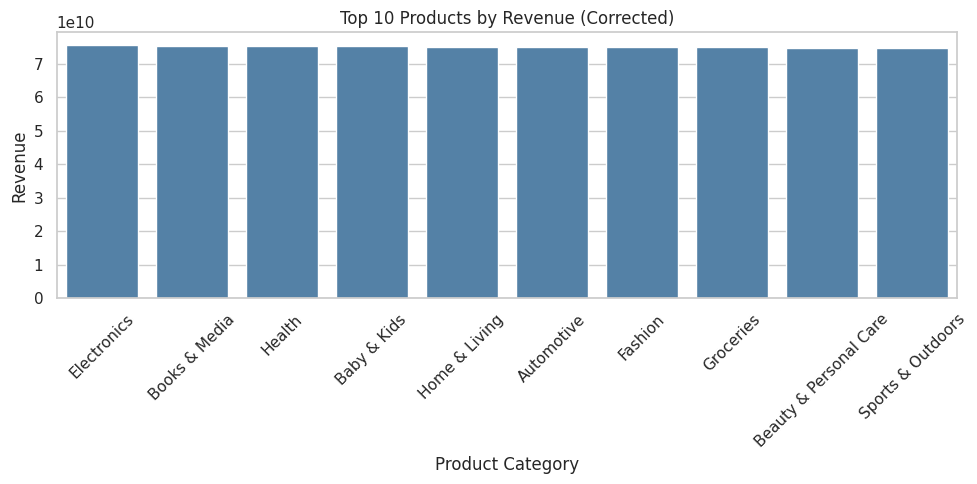

,product_category,TotalAmount,Percentage
4,Electronics,7.565796e+10,10.07
3,Books & Media,7.545073e+10,10.04
7,Health,7.528478e+10,10.02
1,Baby & Kids,7.528425e+10,10.02
8,Home & Living,7.511999e+10,10.00
0,Automotive,7.502220e+10,9.99
5,Fashion,7.495106e+10,9.98
6,Groceries,7.494019e+10,9.98
2,Beauty & Personal Care,7.478472e+10,9.96
9,Sports & Outdoors,7.467912e+10,9.94


In [ ]:
# ✅ Corrected Cell for Top Regions & Top Products by Revenue
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric and clean data
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit_price_ngn'] = pd.to_numeric(df['unit_price_ngn'], errors='coerce')
if 'TotalAmount' not in df.columns:
    df['TotalAmount'] = df['quantity'] * df['unit_price_ngn']

# Clean product and city names
if 'city' in df.columns:
    df['city'] = df['city'].astype(str).str.strip().str.title()
if 'product_category' in df.columns:
    df['product_category'] = df['product_category'].astype(str).str.strip().str.title()

# Remove invalid or zero values
df = df.dropna(subset=['TotalAmount'])
df = df[df['TotalAmount'] > 0]

# -----------------------------
# 1️⃣ Top Regions by Revenue
# -----------------------------
if 'city' in df.columns:
    region_revenue = (
        df.groupby('city', as_index=False)['TotalAmount']
        .sum()
        .sort_values('TotalAmount', ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10,5))
    sns.barplot(data=region_revenue, x='city', y='TotalAmount', color='seagreen')
    plt.title('Top Regions by Revenue (Corrected)')
    plt.ylabel('Revenue')
    plt.xlabel('City')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("images/top_regions_corrected.png", dpi=150)
    plt.show()

    # Optional percentage contribution
    region_revenue['Percentage'] = (region_revenue['TotalAmount'] / region_revenue['TotalAmount'].sum() * 100).round(2)
    display(region_revenue)

else:
    print("⚠️ 'city' column not found — skipping region plot.")


# -----------------------------
# 2️⃣ Top Products by Revenue
# -----------------------------
product_col = None
for c in df.columns:
    if 'product' in c.lower() or 'category' in c.lower():
        product_col = c
        break

if product_col:
    product_revenue = (
        df.groupby(product_col, as_index=False)['TotalAmount']
        .sum()
        .sort_values('TotalAmount', ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10,5))
    sns.barplot(data=product_revenue, x=product_col, y='TotalAmount', color='steelblue')
    plt.title('Top 10 Products by Revenue (Corrected)')
    plt.ylabel('Revenue')
    plt.xlabel('Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("images/top_products_corrected.png", dpi=150)
    plt.show()

    # Optional percentage contribution
    product_revenue['Percentage'] = (product_revenue['TotalAmount'] / product_revenue['TotalAmount'].sum() * 100).round(2)
    display(product_revenue)

else:
    print("⚠️ 'product_category' or similar column not found — skipping product plot.")

Top 20% customers contribute 45.66% of revenue


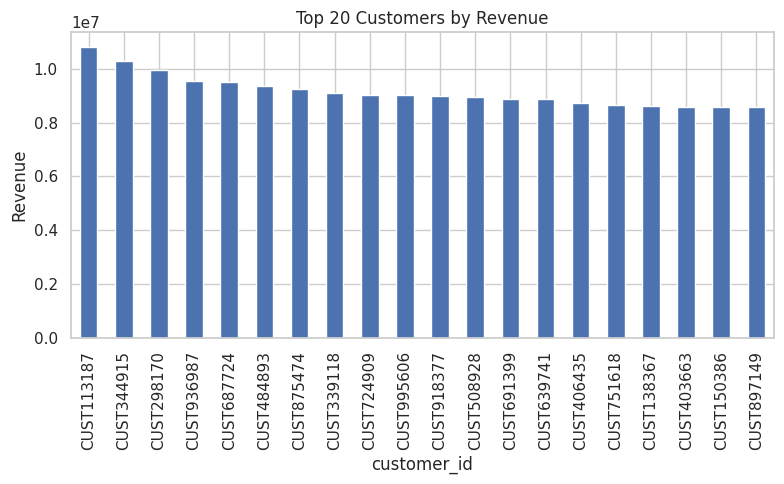

In [ ]:
# Cell 11 — Top customers Pareto (if customer column exists)
if cust_col:
    cust_rev = df.groupby(cust_col)['TotalAmount'].sum().sort_values(ascending=False)
    top20_sum = cust_rev.head(int(0.2*len(cust_rev))).sum()
    total_rev = cust_rev.sum()
    print(f"Top 20% customers contribute {top20_sum/total_rev:.2%} of revenue")
    plt.figure(figsize=(8,5))
    cust_rev.head(20).plot(kind='bar')
    plt.title('Top 20 Customers by Revenue')
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.savefig("images/top_customers.png", dpi=150)
    plt.show()
else:
    print("Customer column not detected — skip top customers.")


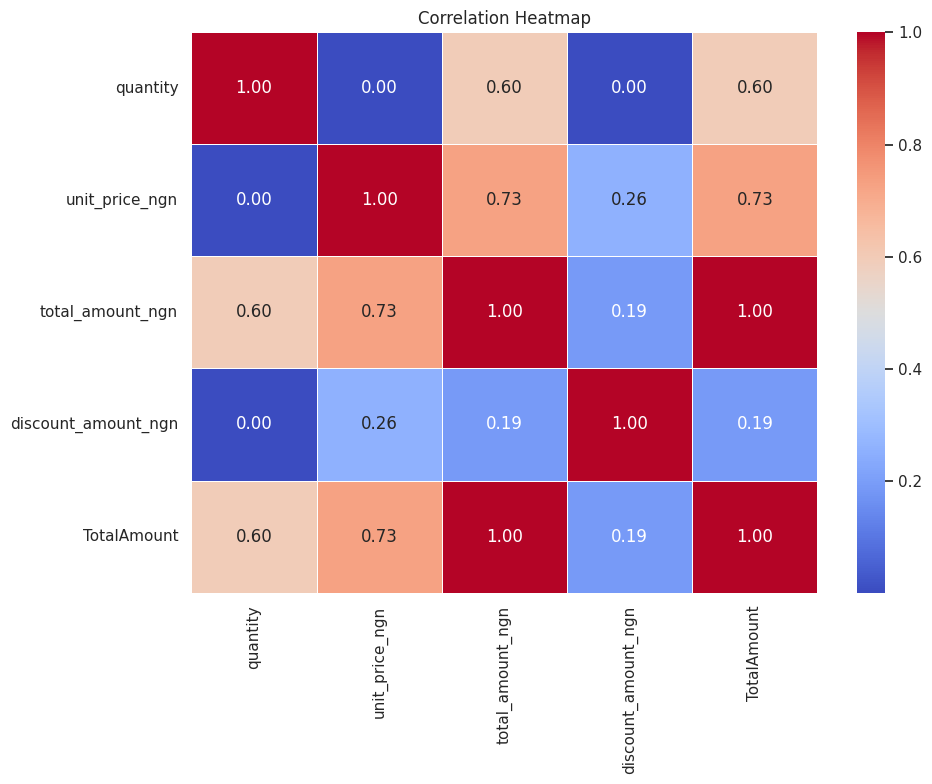

In [ ]:
# Cell 12 — Correlation heatmap (numeric)
num_cols_small = [c for c in num_cols if df[c].nunique() > 1]
if len(num_cols_small) >= 2:
    corr = df[num_cols_small].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.4)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.savefig("images/correlation_heatmap.png", dpi=150)
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")


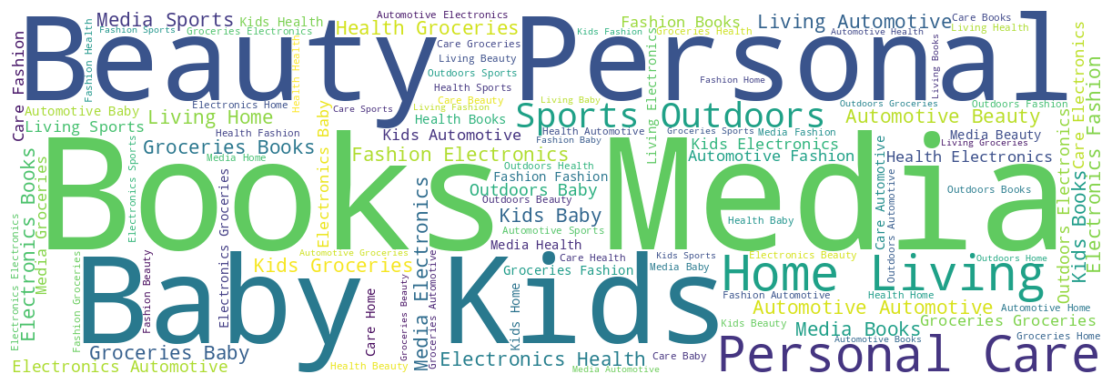

In [ ]:
# Cell 13 — WordCloud for product descriptions (if description exists)
desc_col = None
for c in df.columns:
    if 'description' in c.lower() or 'product' in c.lower() and df[c].dtype == object:
        desc_col = c
        break

if desc_col:
    text = " ".join(str(s) for s in df[desc_col].dropna().astype(str).values)
    wc = WordCloud(width=1200, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("images/wordcloud_products.png", dpi=150)
    plt.show()
else:
    print("No product description/text column found for wordcloud.")


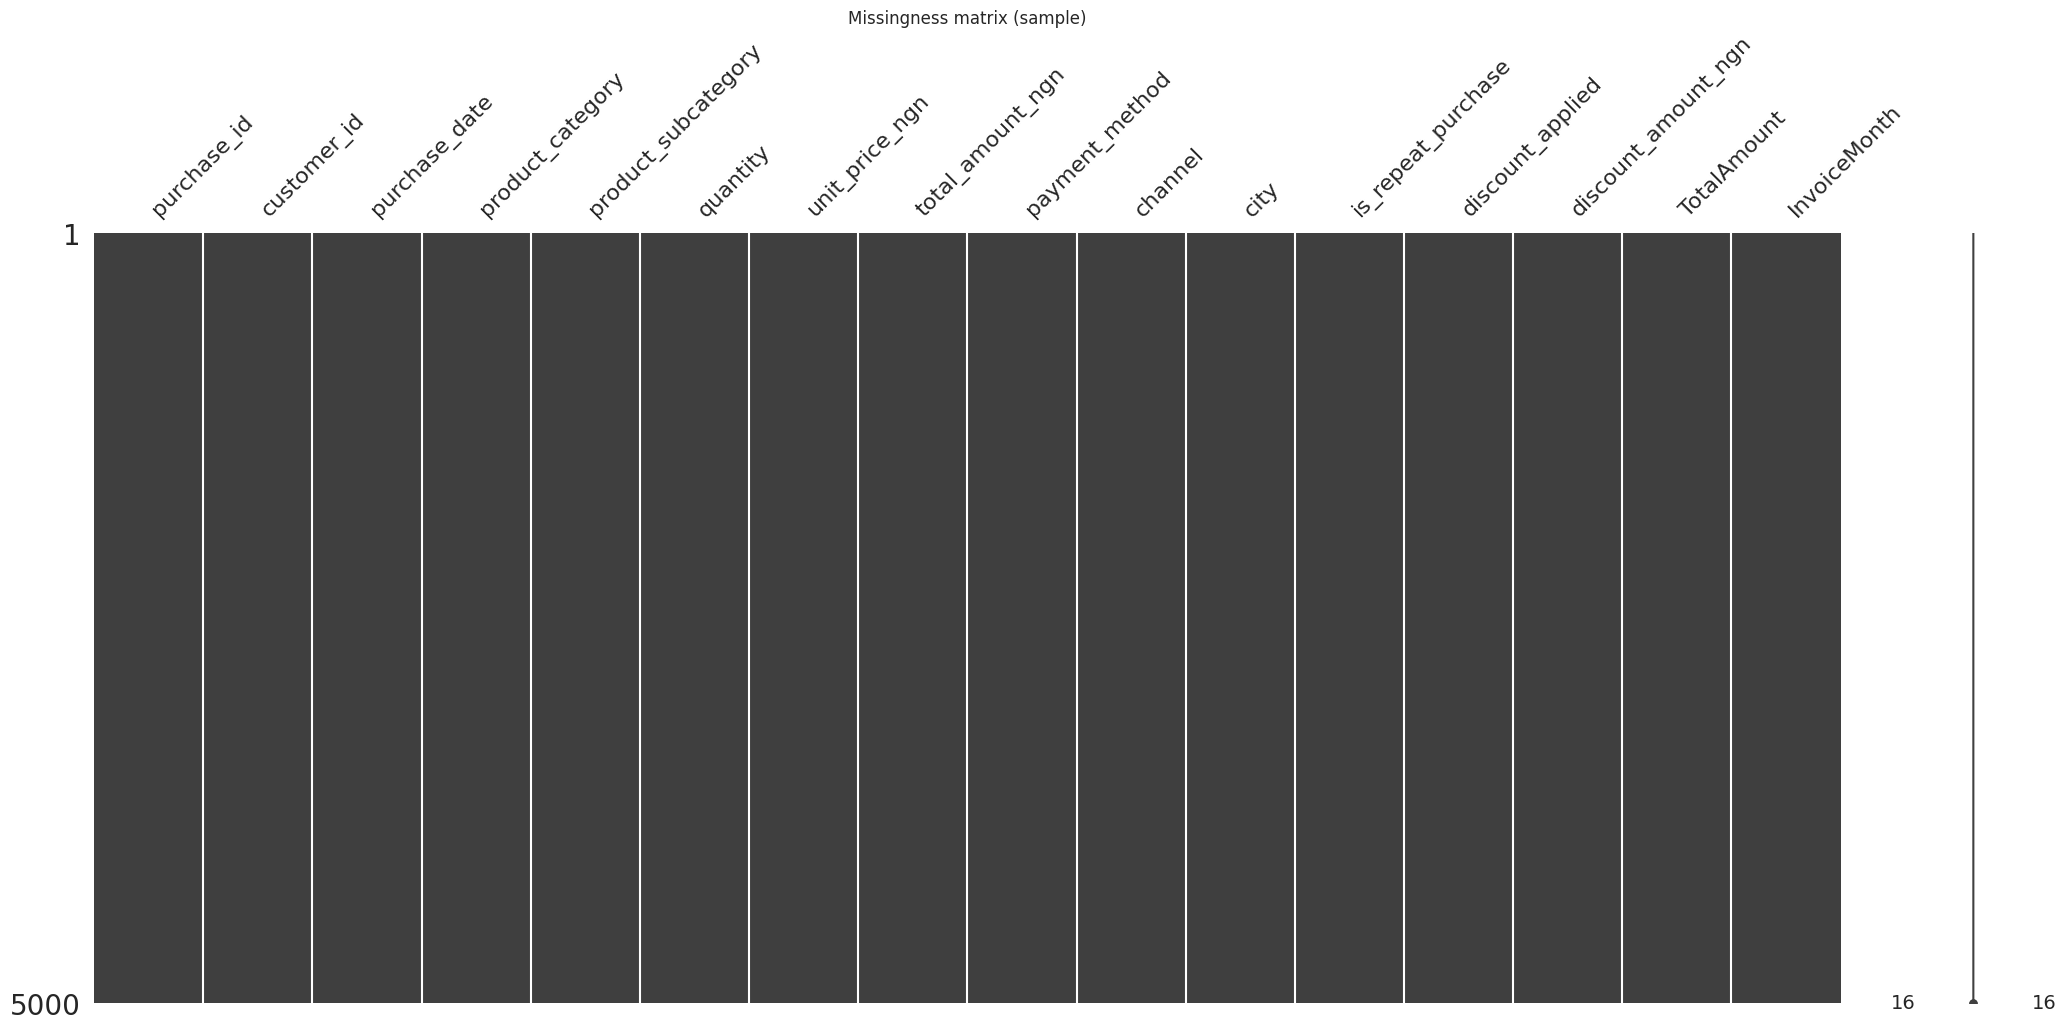

In [ ]:
# Cell 14 — Missingness matrix (sample if very large)
sample_df = df.sample(min(len(df), 5000), random_state=42)
msno.matrix(sample_df)
plt.title("Missingness matrix (sample)")
plt.savefig("images/missingness_matrix.png", dpi=150)
plt.show()


In [ ]:
# Cell 15 — Auto-generate short dataset description text for report
rows, cols = df.shape
first_date = df[date_col].min() if date_col else None
last_date = df[date_col].max() if date_col else None
unique_customers = df[cust_col].nunique() if cust_col else "N/A"

# Define prod_col using the previously detected possible_product_cols
prod_col = possible_product_cols[0] if possible_product_cols else None
unique_products = df[prod_col].nunique() if prod_col else "N/A"

desc_text = f"""
Dataset Description:
- Rows: {rows}, Columns: {cols}
- Time span: {first_date} to {last_date}
- Unique customers: {unique_customers}
- Unique products: {unique_products}
Key preprocessing done: converted date fields, created TotalAmount, removed invalid rows (negative quantity/price), handled missing CustomerID where necessary.
Saved main EDA figures in /images/ folder for insertion into the report.
"""

print(desc_text)
with open("images/dataset_description.txt", "w") as f:
    f.write(desc_text)



Dataset Description:
- Rows: 1000000, Columns: 16
- Time span: 2023-01-01 00:00:00 to 2024-12-01 00:00:00
- Unique customers: 603488
- Unique products: 10
Key preprocessing done: converted date fields, created TotalAmount, removed invalid rows (negative quantity/price), handled missing CustomerID where necessary.
Saved main EDA figures in /images/ folder for insertion into the report.



In [ ]:
# Cell A — Ensure key columns and types (run)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(10,5)

# If detection failed earlier, set these manually:
# date_col = 'date'          # uncomment & set if needed
# cust_col = 'customer_id'   # uncomment & set if needed
# prod_col = 'product_category' # uncomment & set if needed

# Use earlier-detected guesses if not set
try:
    date_col
except NameError:
    possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
    date_col = possible_date_cols[0] if possible_date_cols else None

try:
    cust_col
except NameError:
    possible_customer_cols = [c for c in df.columns if 'customer' in c.lower() or 'user' in c.lower() or 'buyer' in c.lower()]
    cust_col = possible_customer_cols[0] if possible_customer_cols else None

# Quick report
print("Using date_col:", date_col)
print("Using cust_col:", cust_col)
assert date_col is not None and cust_col is not None, "Please set date_col and cust_col variables to correct column names."


Using date_col: purchase_date
Using cust_col: customer_id


In [ ]:
# Cell B — Ensure numeric columns and TotalAmount
# Try to find qty and price columns
qty_cols = [c for c in df.columns if 'quantity' in c.lower() or c.lower()=='qty']
price_cols = [c for c in df.columns if 'price' in c.lower() or 'unitprice' in c.lower() or 'unit_price' in c.lower() or 'amount' in c.lower()]

qty_col = qty_cols[0] if qty_cols else None
price_col = price_cols[0] if price_cols else None

print("Detected qty_col:", qty_col, "price_col:", price_col)

# convert and create TotalAmount
if qty_col:
    df[qty_col] = pd.to_numeric(df[qty_col], errors='coerce')
if price_col:
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

if 'TotalAmount' not in df.columns:
    if qty_col and price_col:
        df['TotalAmount'] = df[qty_col].fillna(0) * df[price_col].fillna(0)
        print("Created TotalAmount from qty*price")
    else:
        # fallback: if there's a column like total_amount or totalprice
        fallback = [c for c in df.columns if 'total' in c.lower() and 'amount' in c.lower() or 'totalprice' in c.lower()]
        if fallback:
            df['TotalAmount'] = pd.to_numeric(df[fallback[0]], errors='coerce')
            print("Used fallback for TotalAmount:", fallback[0])
        else:
            raise ValueError("No way to compute TotalAmount — please provide qty and price columns")

# ensure date parsed
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
print("Total transactions:", len(df))
display(df[[cust_col, date_col, 'TotalAmount']].head())


Detected qty_col: quantity price_col: unit_price_ngn
Total transactions: 1000000


,customer_id,purchase_date,TotalAmount
0,CUST738296,2023-03-07,684889.45
1,CUST566795,2024-06-17,594814.94
2,CUST238819,2024-06-13,1419684.70
3,CUST974466,2023-09-27,471821.12
4,CUST686049,2024-05-16,655118.50


In [ ]:
# Cell C — RFM computation
# snapshot_date = most recent transaction date + 1 day
snapshot_date = df[date_col].max() + pd.Timedelta(days=1)
print("Snapshot date used for Recency:", snapshot_date.date())

# Aggregation: recency (days), frequency (#invoices), monetary (sum)
# Frequency uses distinct invoice if invoice exists, else count transactions
invoice_cols = [c for c in df.columns if 'invoice' in c.lower() or 'order' in c.lower()]
inv_col = invoice_cols[0] if invoice_cols else None

agg = {}
if inv_col:
    agg = {date_col: 'max', inv_col: 'nunique', 'TotalAmount': 'sum'}
else:
    agg = {date_col: 'max', 'TotalAmount': 'sum', cust_col: 'count'}

rfm = df.groupby(cust_col).agg(agg).reset_index()
# rename
if inv_col:
    rfm.columns = [cust_col, 'LastPurchaseDate', 'Frequency', 'Monetary']
else:
    rfm.columns = [cust_col, 'LastPurchaseDate', 'Monetary', 'TempCount']
    rfm = rfm.rename(columns={'TempCount':'Frequency'})

# recency in days
rfm['Recency'] = (snapshot_date - rfm['LastPurchaseDate']).dt.days
# ensure monetary non-negative
rfm['Monetary'] = rfm['Monetary'].clip(lower=0)
# drop zero monetary or zero frequency if you prefer
rfm = rfm[(rfm['Frequency']>0) & (rfm['Monetary']>0)]
rfm = rfm[[cust_col,'Recency','Frequency','Monetary']]
print("RFM shape:", rfm.shape)
display(rfm.head())


Snapshot date used for Recency: 2024-12-02
RFM shape: (603488, 4)


,customer_id,Recency,Frequency,Monetary
0,CUST100002,206,2,629493.81
1,CUST100003,403,2,186212.68
2,CUST100005,155,1,867376.96
3,CUST100006,695,1,512410.96
4,CUST100007,214,2,1274059.70


In [ ]:
# Cell D — RFM scoring and simple segment label
# We score Recency reversed (lower days -> higher score)
rfm['r_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['f_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['m_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']
rfm['RFM_Segment'] = rfm['r_score'].map(str)+rfm['f_score'].map(str)+rfm['m_score'].map(str)

# quick checks
display(rfm[['Recency','Frequency','Monetary','r_score','f_score','m_score','RFM_Score']].describe().round(2))
rfm['RFM_Segment'].value_counts().head(10)
# save
rfm.to_csv("images/rfm_customer_summary.csv", index=False)


,Recency,Frequency,Monetary,r_score,f_score,m_score,RFM_Score
count,603488.00,603488.00,603488.00,603488.00,603488.00,603488.00,603488.00
mean,287.35,1.62,1244722.34,3.00,3.00,3.00,9.00
std,196.33,0.83,1006742.18,1.42,1.41,1.41,3.17
min,1.00,1.00,1001.12,1.00,1.00,1.00,3.00
25%,116.00,1.00,448707.24,2.00,2.00,2.00,6.00
50%,258.00,1.00,1001655.43,3.00,3.00,3.00,9.00
75%,441.00,2.00,1797000.41,4.00,4.00,4.00,12.00
max,701.00,8.00,10817880.02,5.00,5.00,5.00,15.00


Running Elbow + Silhouette on 603488 total samples (silhouette computed on 10000 sample)...
k=2: SSE=1069378.94, silhouette=0.3910, time=3.6s
k=3: SSE=732260.38, silhouette=0.3607, time=4.2s
k=4: SSE=597385.88, silhouette=0.3529, time=14.3s
k=5: SSE=512554.64, silhouette=0.3556, time=4.6s
k=6: SSE=454385.96, silhouette=0.3476, time=8.2s
k=7: SSE=402345.91, silhouette=0.3485, time=5.8s


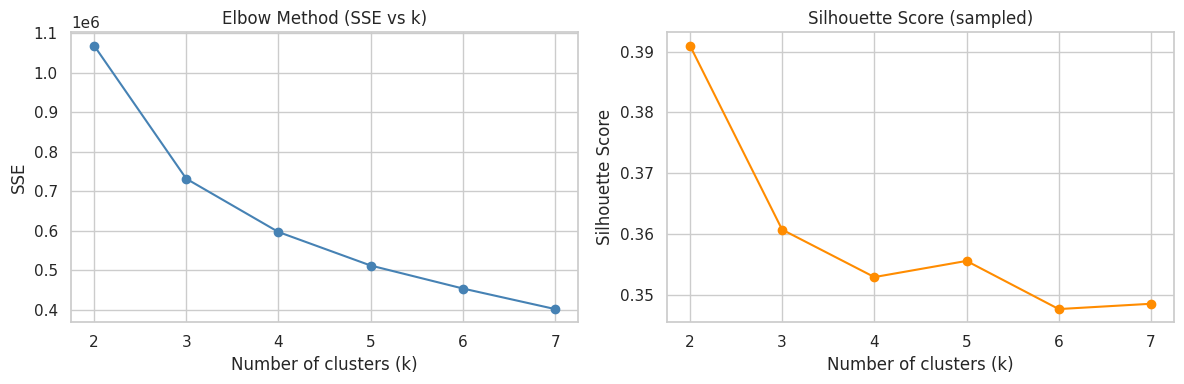

In [ ]:
# Cell E — Optimized Elbow & Silhouette (fast version for large datasets)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np, time, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
X = rfm[['Recency','Frequency','Monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse, sil = [], []
K = range(2, 8)

# --- sample up to 10k points for silhouette to speed up ---
sample_idx = np.random.choice(len(X_scaled),
                              size=min(10000, len(X_scaled)),
                              replace=False)
X_sample = X_scaled[sample_idx]

print(f"Running Elbow + Silhouette on {len(X_scaled)} total samples "
      f"(silhouette computed on {len(X_sample)} sample)...")

for k in K:
    start = time.time()
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

    # silhouette only on sample subset
    sil_k = silhouette_score(X_sample, km.predict(X_sample))
    sil.append(sil_k)
    print(f"k={k}: SSE={km.inertia_:.2f}, silhouette={sil_k:.4f}, "
          f"time={time.time()-start:.1f}s")

# --- Plot results ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K, sse, 'o-', color='steelblue')
plt.title('Elbow Method (SSE vs k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(K, sil, 'o-', color='darkorange')
plt.title('Silhouette Score (sampled)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig("images/elbow_silhouette_fast.png", dpi=150)
plt.show()


,Recency_median,Frequency_median,Monetary_median,Monetary_mean,Count
cluster,,,,,
1,150.0,3.0,2402295.67,2.549378e+06,142425
2,156.0,1.0,778601.28,8.502991e+05,246884
0,503.0,1.0,693017.08,8.318023e+05,214179


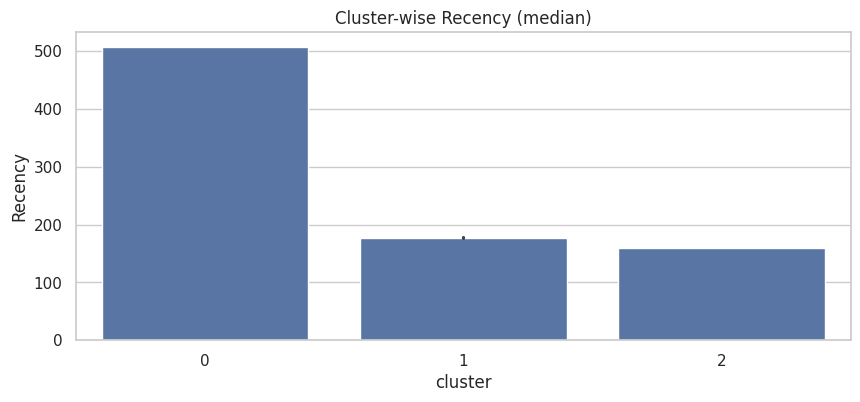

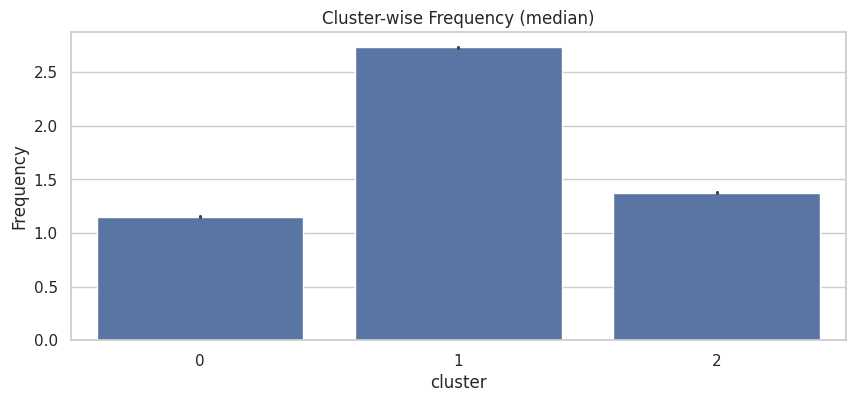

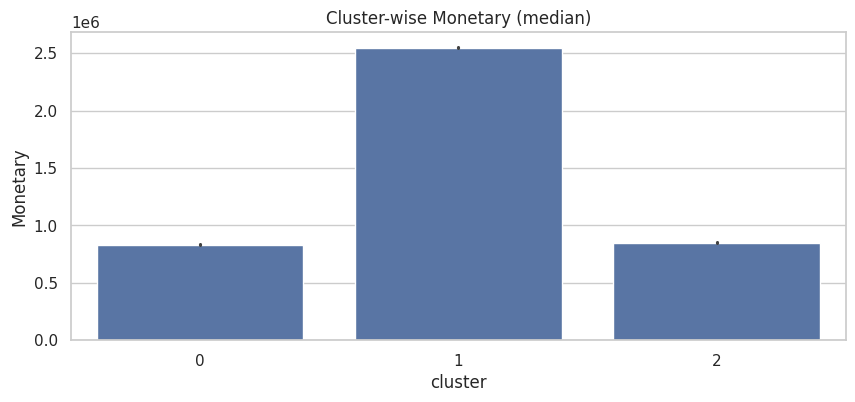

In [ ]:
# Cell F — Fit final KMeans (set k after inspecting elbow/silhouette)
k = 3   # choose based on previous plots; adjust to 3-6 as appropriate
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
rfm['cluster'] = kmeans.fit_predict(X_scaled)

# attach scaled features if needed
rfm[['R_recency_scaled','R_freq_scaled','R_monetary_scaled']] = pd.DataFrame(X_scaled, index=rfm.index)

# cluster profiling
cluster_profile = rfm.groupby('cluster').agg({
    'Recency':'median',
    'Frequency':'median',
    'Monetary':['median','mean','count']
})
cluster_profile.columns = ['Recency_median','Frequency_median','Monetary_median','Monetary_mean','Count']
cluster_profile = cluster_profile.sort_values('Monetary_mean', ascending=False)
display(cluster_profile)

# plot cluster RFM means
plt.figure(figsize=(10,4))
sns.barplot(x='cluster', y='Recency', data=rfm)
plt.title('Cluster-wise Recency (median)')
plt.savefig("images/cluster_recency.png", dpi=150)
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='cluster', y='Frequency', data=rfm)
plt.title('Cluster-wise Frequency (median)')
plt.savefig("images/cluster_frequency.png", dpi=150)
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='cluster', y='Monetary', data=rfm)
plt.title('Cluster-wise Monetary (median)')
plt.savefig("images/cluster_monetary.png", dpi=150)
plt.show()

rfm.to_csv("images/rfm_with_cluster.csv", index=False)


/tmp/ipython-input-580633162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_revenue, x='payment_method', y='TotalAmount', palette='viridis')


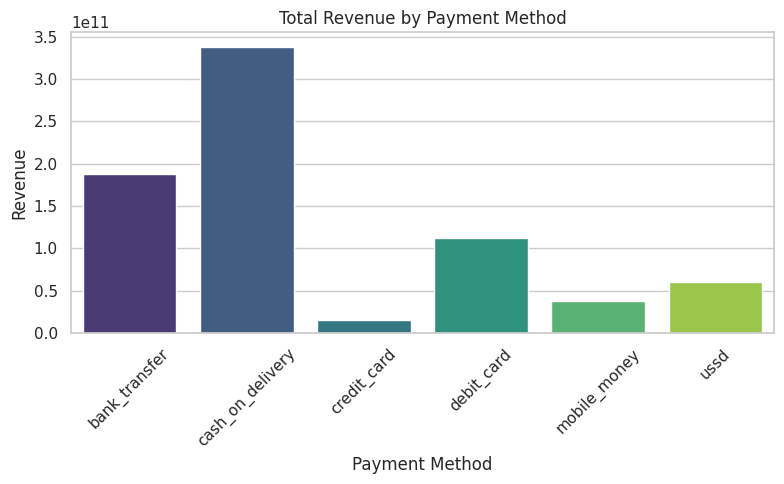

/tmp/ipython-input-580633162.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_count.index, y=payment_count.values, palette='Set2')


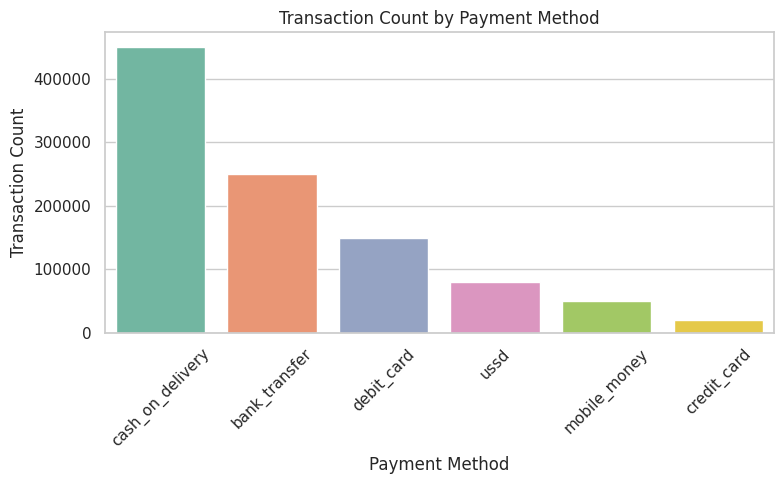

✅ Payment Method EDA Completed.


In [ ]:
# ============================================================
# 📊 PAYMENT METHOD ANALYSIS (EDA)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure TotalAmount exists
# Corrected column name to 'unit_price_ngn' based on dataset structure
df['TotalAmount'] = df['quantity'] * df['unit_price_ngn']

# 1) Payment method revenue contribution
payment_revenue = df.groupby('payment_method')['TotalAmount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=payment_revenue, x='payment_method', y='TotalAmount', palette='viridis')
plt.title("Total Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/payment_method_revenue.png", dpi=150)
plt.show()

# 2) Payment method usage count
payment_count = df['payment_method'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=payment_count.index, y=payment_count.values, palette='Set2')
plt.title("Transaction Count by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/payment_method_count.png", dpi=150)
plt.show()

print("✅ Payment Method EDA Completed.")

/tmp/ipython-input-793153063.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=city_revenue, x='city', y='TotalAmount', palette='Blues_d')


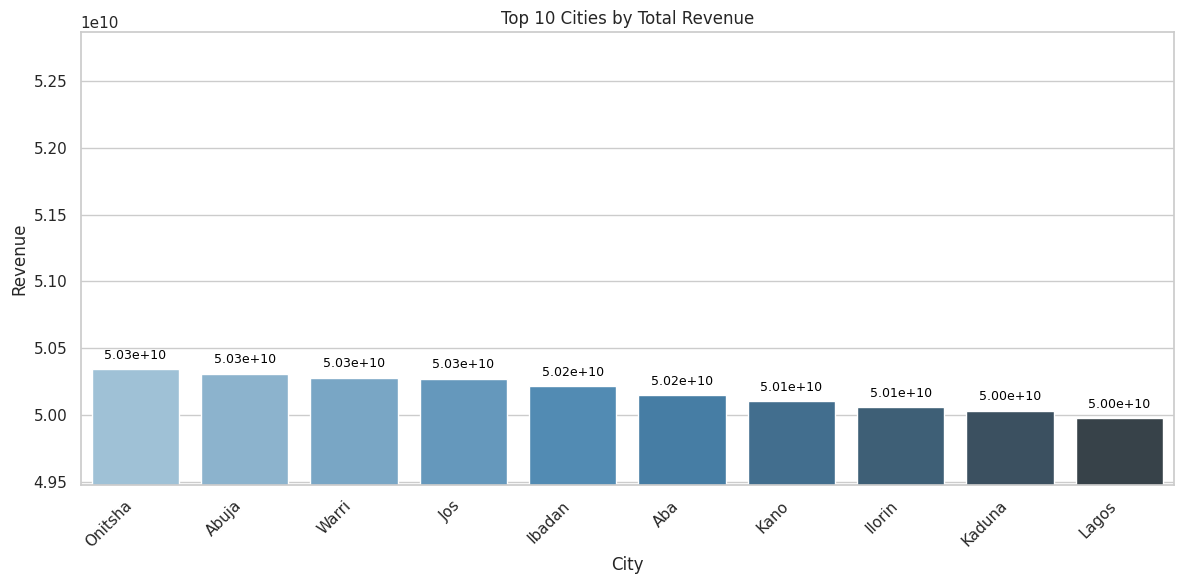

/tmp/ipython-input-793153063.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=city_orders, x='city', y='order_count', palette='Greens_d')


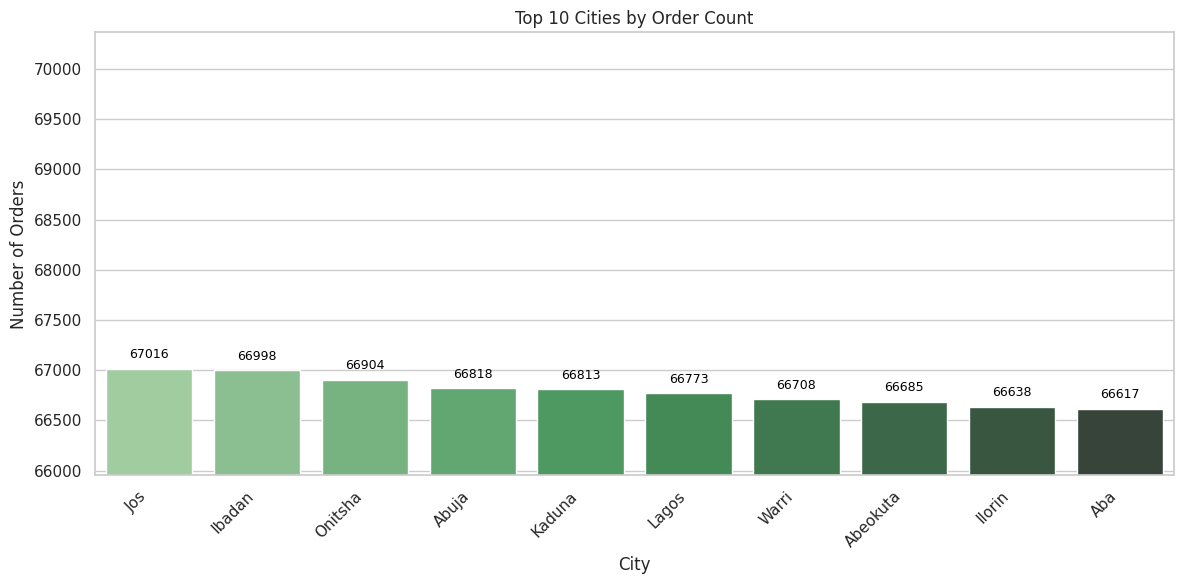

/tmp/ipython-input-793153063.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=city_aov, x='city', y='TotalAmount', palette='Purples_d')


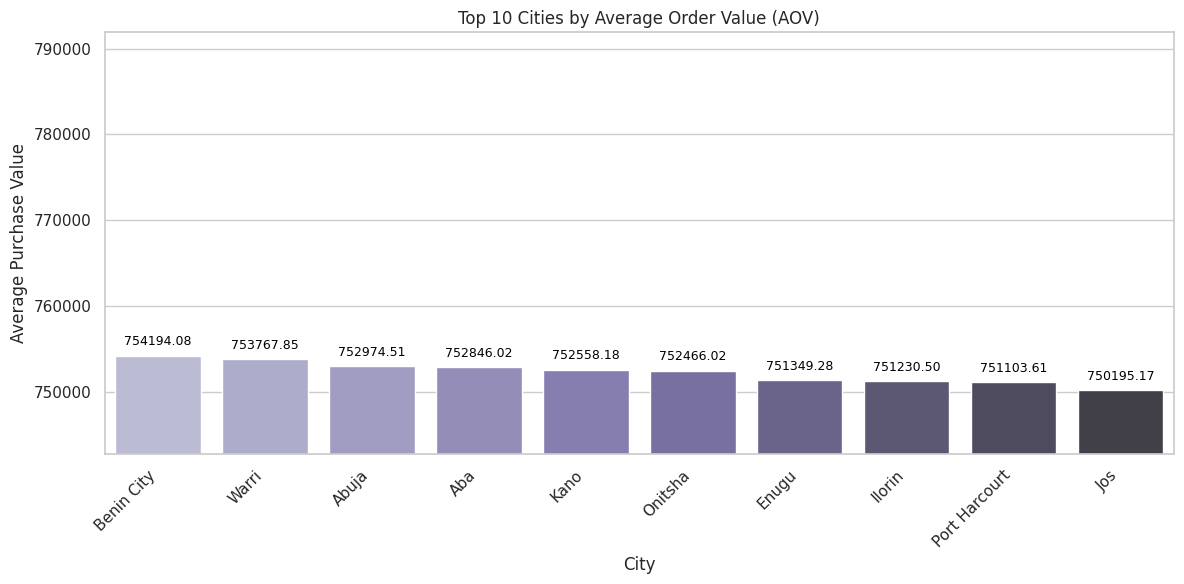

✔ City-wise EDA Completed. Images saved in /images


In [ ]:
# ============================================================
# 📊 CITY-WISE EDA (Revenue, Orders, AOV)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure TotalAmount exists
df['TotalAmount'] = df['quantity'] * df['unit_price_ngn']

# 1‰ Revenue by City
city_revenue = df.groupby('city')['TotalAmount'].sum().reset_index().sort_values(by='TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax1 = sns.barplot(data=city_revenue, x='city', y='TotalAmount', palette='Blues_d')
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
# Adjust y-axis to zoom into differences and add labels
min_revenue = city_revenue['TotalAmount'].min()
ax1.set_ylim(bottom=min_revenue * 0.99)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2e}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                 color='black', fontsize=9)
plt.tight_layout()
plt.savefig("images/city_revenue.png", dpi=150)
plt.show()

# 2‰ Order Count by City
city_orders = df['city'].value_counts().reset_index().head(10)
city_orders.columns = ['city', 'order_count']

plt.figure(figsize=(12,6))
ax2 = sns.barplot(data=city_orders, x='city', y='order_count', palette='Greens_d')
plt.title("Top 10 Cities by Order Count")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right')
# Adjust y-axis to zoom into differences and add labels
min_orders = city_orders['order_count'].min()
ax2.set_ylim(bottom=min_orders * 0.99)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                 color='black', fontsize=9)
plt.tight_layout()
plt.savefig("images/city_order_count.png", dpi=150)
plt.show()

# 3‰ Average Order Value (AOV) by City
city_aov = df.groupby('city')['TotalAmount'].mean().reset_index().sort_values(by='TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax3 = sns.barplot(data=city_aov, x='city', y='TotalAmount', palette='Purples_d')
plt.title("Top 10 Cities by Average Order Value (AOV)")
plt.xlabel("City")
plt.ylabel("Average Purchase Value")
plt.xticks(rotation=45, ha='right')
# Adjust y-axis to zoom into differences and add labels
min_aov = city_aov['TotalAmount'].min()
ax3.set_ylim(bottom=min_aov * 0.99)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                 color='black', fontsize=9)
plt.tight_layout()
plt.savefig("images/city_aov.png", dpi=150)
plt.show()

print("✔ City-wise EDA Completed. Images saved in /images")

,Recency_median,Frequency_median,Monetary_median,Monetary_mean,Count
cluster,,,,,
1,150.0,3.0,2402295.67,2.549378e+06,142425
2,156.0,1.0,778601.28,8.502991e+05,246884
0,503.0,1.0,693017.08,8.318023e+05,214179


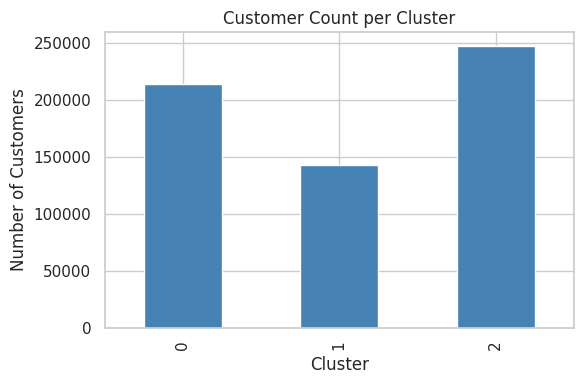

/tmp/ipython-input-3063329859.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Recency', data=rfm, ax=axes[0], palette='Set2')
/tmp/ipython-input-3063329859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Frequency', data=rfm, ax=axes[1], palette='Set2')
/tmp/ipython-input-3063329859.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Monetary', data=rfm, ax=axes[2], palette='Set2')


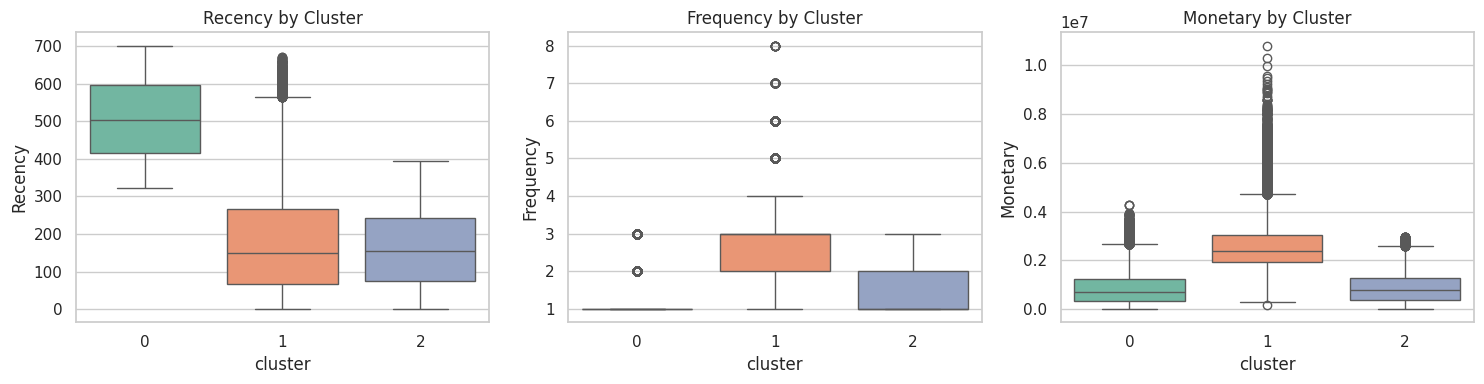

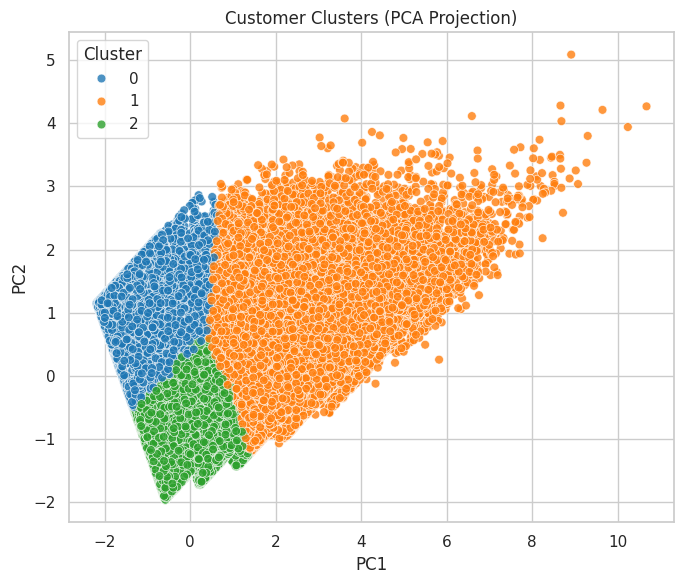


--- Cluster Summary (Median RFM + Size) ---

         Recency_median  Frequency_median  Monetary_median  Monetary_mean  \
cluster                                                                     
1                 150.0               3.0       2402295.67   2.549378e+06   
2                 156.0               1.0        778601.28   8.502991e+05   
0                 503.0               1.0        693017.08   8.318023e+05   

          Count  
cluster          
1        142425  
2        246884  
0        214179  

💡 Interpretation Tip:
Lower Recency = recent buyers (better).
Higher Frequency & Monetary = loyal / high-value customers.
Use these stats to label clusters as: 'Loyal', 'Regular', 'At-Risk', etc.


In [ ]:
# ✅ Display & Visualize Clustering Results (for report)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Ensure your RFM with clusters exists
assert 'cluster' in rfm.columns, "Cluster column not found! Please run Cell F first."

# ------------------------------
# 1️⃣  Cluster Summary Statistics
# ------------------------------
cluster_summary = (
    rfm.groupby('cluster')
       .agg({
           'Recency':'median',
           'Frequency':'median',
           'Monetary':['median','mean','count']
       })
)
cluster_summary.columns = ['Recency_median','Frequency_median','Monetary_median','Monetary_mean','Count']
cluster_summary = cluster_summary.sort_values('Monetary_mean', ascending=False)
display(cluster_summary)

# Save to CSV
cluster_summary.to_csv("images/cluster_summary.csv")

# ------------------------------
# 2️⃣  Cluster Counts Bar Chart
# ------------------------------
plt.figure(figsize=(6,4))
rfm['cluster'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig("images/cluster_counts.png", dpi=150)
plt.show()

# ------------------------------
# 3️⃣  RFM Metric Comparison per Cluster (Boxplots)
# ------------------------------
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(x='cluster', y='Recency', data=rfm, ax=axes[0], palette='Set2')
sns.boxplot(x='cluster', y='Frequency', data=rfm, ax=axes[1], palette='Set2')
sns.boxplot(x='cluster', y='Monetary', data=rfm, ax=axes[2], palette='Set2')
axes[0].set_title('Recency by Cluster')
axes[1].set_title('Frequency by Cluster')
axes[2].set_title('Monetary by Cluster')
plt.tight_layout()
plt.savefig("images/cluster_rfm_boxplots.png", dpi=150)
plt.show()

# ------------------------------
# 5️⃣  PCA Projection (if already computed)
# ------------------------------
try:
    from sklearn.decomposition import PCA
    X_scaled = scaler.transform(rfm[['Recency','Frequency','Monetary']])
    pcs = PCA(n_components=2).fit_transform(X_scaled)
    pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
    pc_df['cluster'] = rfm['cluster'].values
    plt.figure(figsize=(7,6))
    sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=40, alpha=0.8)
    plt.title('Customer Clusters (PCA Projection)')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.savefig("images/cluster_pca_projection.png", dpi=150)
    plt.show()
except Exception as e:
    print("PCA projection skipped:", e)

# ------------------------------
# 6️⃣  Cluster Summary Insights (Print)
# ------------------------------
print("\n--- Cluster Summary (Median RFM + Size) ---\n")
print(cluster_summary)
print("\n💡 Interpretation Tip:")
print("Lower Recency = recent buyers (better).")
print("Higher Frequency & Monetary = loyal / high-value customers.")
print("Use these stats to label clusters as: 'Loyal', 'Regular', 'At-Risk', etc.")


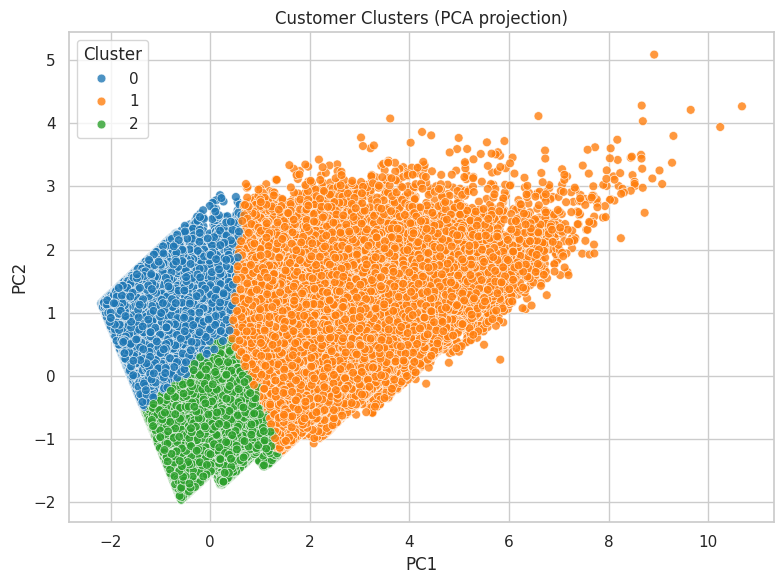

In [ ]:
# Cell G — 2D projection for cluster visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'], index=rfm.index)
pc_df['cluster'] = rfm['cluster'].values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=40, alpha=0.8)
plt.title('Customer Clusters (PCA projection)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("images/rfm_clusters_pca.png", dpi=150)
plt.show()


In [ ]:
# Cell H — Create churn target: no purchase in last N days (e.g., 90 days)
churn_days = 60
customer_last = rfm[[cust_col,'Recency']].copy()
customer_last['ChurnFlag'] = (customer_last['Recency'] > churn_days).astype(int)

# Merge churn flag into rfm features
rfm_pred = rfm.merge(customer_last[[cust_col,'ChurnFlag']], on=cust_col, how='left')
rfm_pred['ChurnFlag'].value_counts()
rfm_pred.to_csv("images/rfm_for_model.csv", index=False)
display(rfm_pred.head())


,customer_id,Recency,Frequency,Monetary,r_score,f_score,m_score,RFM_Score,RFM_Segment,cluster,R_recency_scaled,R_freq_scaled,R_monetary_scaled,ChurnFlag
0,CUST100002,206,2,629493.81,3,3,2,8,332,2,-0.414365,0.463118,-0.611109,1
1,CUST100003,403,2,186212.68,2,3,1,6,231,0,0.589066,0.463118,-1.051422,1
2,CUST100005,155,1,867376.96,4,1,3,8,413,2,-0.674136,-0.748110,-0.374819,1
3,CUST100006,695,1,512410.96,1,1,2,4,112,0,2.076385,-0.748110,-0.727408,1
4,CUST100007,214,2,1274059.70,3,3,3,9,333,2,-0.373616,0.463118,0.029141,1


In [ ]:
# ✅ Cell I — Prepare ML dataset & features (Leakage fixed + Balanced option)

from sklearn.model_selection import train_test_split

# 🚫 Remove Recency and r_score (they directly define churn)
# ✅ Keep only independent behavioral features
features = ['Frequency', 'Monetary', 'f_score', 'm_score', 'RFM_Score', 'cluster']

X = rfm_pred[features]
y = rfm_pred['ChurnFlag']

# check target balance
print(y.value_counts(normalize=True))

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


ChurnFlag
1    0.864736
0    0.135264
Name: proportion, dtype: float64
Train shape: (452616, 6) Test shape: (150872, 6)


In [ ]:
# ✅ Cell J — Train Logistic Regression & RandomForest (Balanced + Leakage Fix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Logistic Regression (balanced)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

# Random Forest (balanced)
# ✅ Cell J — moderate-depth Random Forest to prevent overfitting
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,              # limit tree depth
    min_samples_split=10,     # require more samples per split
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

def print_metrics(y_true, y_pred, y_proba, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("F1:", round(f1_score(y_true, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_true, y_proba), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()

print_metrics(y_test, y_pred_lr, y_proba_lr, "Logistic Regression (Balanced)")
print_metrics(y_test, y_pred_rf, y_proba_rf, "Random Forest (Balanced)")


--- Logistic Regression (Balanced) ---
Accuracy: 0.9309
Precision: 0.9972
Recall: 0.9227
F1: 0.9585
ROC AUC: 0.9613
Confusion Matrix:
 [[ 20070    337]
 [ 10086 120379]]

--- Random Forest (Balanced) ---
Accuracy: 0.8974
Precision: 1.0
Recall: 0.8814
F1: 0.937
ROC AUC: 0.9639
Confusion Matrix:
 [[ 20405      2]
 [ 15473 114992]]



/tmp/ipython-input-858933984.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')


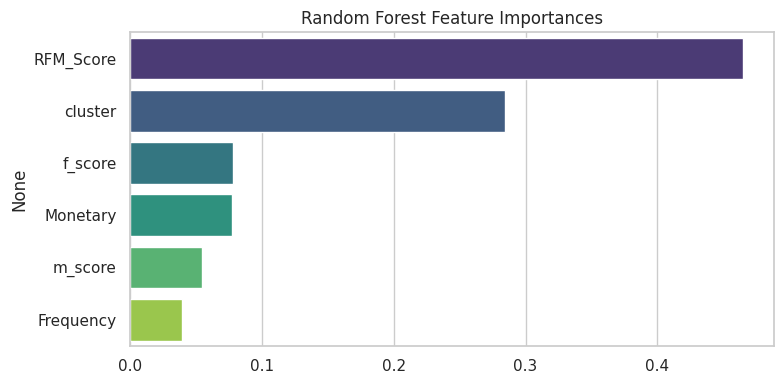

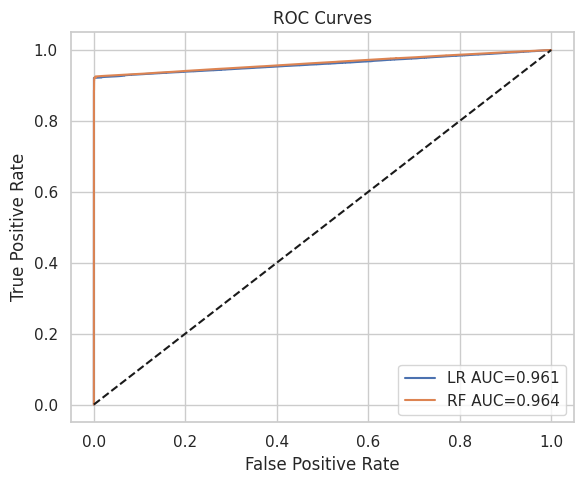

In [ ]:
# Cell K — Feature importance (RF) + ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.savefig("images/feature_importance_rf.png", dpi=150)
plt.show()

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'LR AUC={auc(fpr_lr,tpr_lr):.3f}')
plt.plot(fpr_rf, tpr_rf, label=f'RF AUC={auc(fpr_rf,tpr_rf):.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.tight_layout()
plt.savefig("images/roc_curves.png", dpi=150)
plt.show()


In [ ]:
# ✅ Additional Predictive Models (optional but impressive)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]

# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluate all
for name, yp, yp_proba in [
    ("Decision Tree", y_pred_dt, y_proba_dt),
    ("XGBoost", y_pred_xgb, y_proba_xgb)
]:
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, yp), 4))
    print("Precision:", round(precision_score(y_test, yp), 4))
    print("Recall:", round(recall_score(y_test, yp), 4))
    print("F1:", round(f1_score(y_test, yp), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, yp_proba), 4))
    print()


--- Decision Tree ---
Accuracy: 0.7322
Precision: 0.9867
Recall: 0.6998
F1: 0.8188
ROC AUC: 0.8942

--- XGBoost ---
Accuracy: 0.9355
Precision: 1.0
Recall: 0.9254
F1: 0.9612
ROC AUC: 0.964



In [ ]:
# Cell L — Save final datasets and sample outputs for report
rfm.to_csv("images/rfm_final.csv", index=False)
cluster_profile.to_csv("images/cluster_profile.csv")
feat_imp.to_csv("images/feature_importances.csv")

print("Saved RFM, cluster profile, feature importance and metrics to images/ for report.")


Saved RFM, cluster profile, feature importance and metrics to images/ for report.



--- Logistic Regression ---
Accuracy: 0.9309
Precision: 0.9972
Recall: 0.9227
F1 Score: 0.9585
ROC AUC: 0.9613
Confusion Matrix:
 [[ 20070    337]
 [ 10086 120379]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.79     20407
           1       1.00      0.92      0.96    130465

    accuracy                           0.93    150872
   macro avg       0.83      0.95      0.88    150872
weighted avg       0.95      0.93      0.94    150872


--- Random Forest ---
Accuracy: 0.8974
Precision: 1.0
Recall: 0.8814
F1 Score: 0.937
ROC AUC: 0.9639
Confusion Matrix:
 [[ 20405      2]
 [ 15473 114992]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73     20407
           1       1.00      0.88      0.94    130465

    accuracy                           0.90    150872
   macro avg       0.78      0.94      0.83    150872
weighted avg       0.94      

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.930915,0.997208,0.922692,0.958504,0.961281
1,Random Forest,0.897430,0.999983,0.881401,0.936955,0.963927
2,Decision Tree,0.732237,0.986728,0.699766,0.818833,0.894165
3,XGBoost,0.935475,0.999992,0.925390,0.961246,0.963967


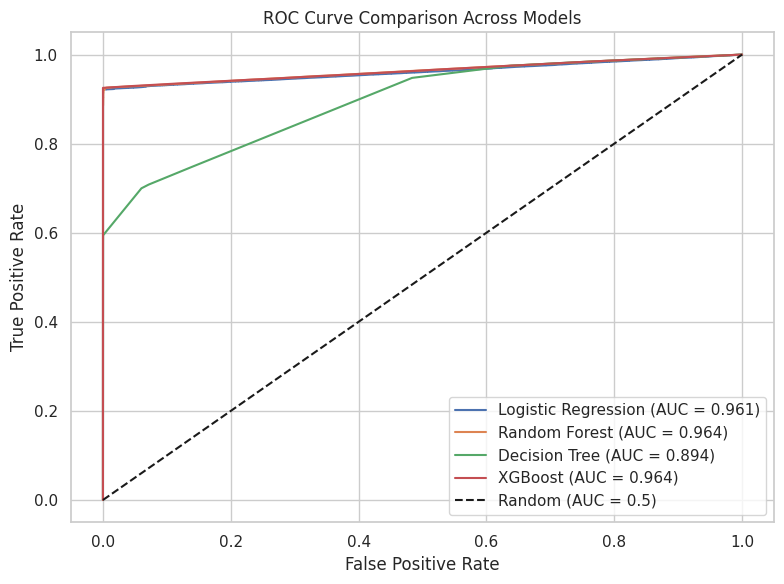

<Figure size 1000x500 with 0 Axes>

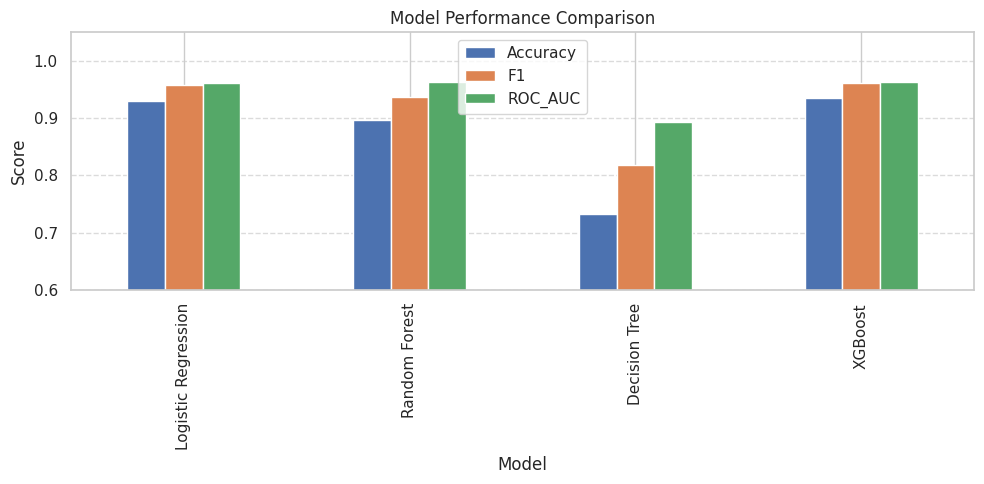


✅ Result Evaluation Complete. Metrics and plots saved in /images folder.


In [ ]:
# ✅ RESULT EVALUATION CELL
# Evaluate all models together using classification metrics & ROC curves

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# --- Dictionary of models and predictions ---
models = {
    "Logistic Regression": (y_test, y_pred_lr, y_proba_lr),
    "Random Forest": (y_test, y_pred_rf, y_proba_rf),
    "Decision Tree": (y_test, y_pred_dt, y_proba_dt),
    "XGBoost": (y_test, y_pred_xgb, y_proba_xgb)
}

results = []

# --- Calculate Metrics ---
for name, (y_true, y_pred, y_proba) in models.items():
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1s = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    results.append([name, acc, prec, rec, f1s, roc_auc])

    print(f"\n--- {name} ---")
    print("Accuracy:", round(acc,4))
    print("Precision:", round(prec,4))
    print("Recall:", round(rec,4))
    print("F1 Score:", round(f1s,4))
    print("ROC AUC:", round(roc_auc,4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# --- Create Results DataFrame ---
import pandas as pd
results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1','ROC_AUC'])
display(results_df)

# --- Save results table ---
results_df.to_csv("images/model_evaluation_results.csv", index=False)

# --- ROC Curve Comparison ---
plt.figure(figsize=(8,6))
for name, (y_true, y_pred, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr,tpr):.3f})')

plt.plot([0,1],[0,1],'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/roc_comparison.png", dpi=150)
plt.show()

# --- Optional: Bar Plot for Metric Comparison ---
plt.figure(figsize=(10,5))
results_df.set_index('Model')[['Accuracy','F1','ROC_AUC']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.6,1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/model_comparison_bar.png", dpi=150)
plt.show()

print("\n✅ Result Evaluation Complete. Metrics and plots saved in /images folder.")


Customer Lifetime Value (CLV) Prediction

,customer_id,Monetary,Churn_Prob,Retention_Prob,CLV
0,CUST100002,629493.81,0.999504,0.000496,3.120411e+02
1,CUST100003,186212.68,0.940439,0.059561,1.109097e+04
2,CUST100005,867376.96,0.870865,0.129135,1.120085e+05
3,CUST100006,512410.96,0.999181,0.000819,4.198678e+02
4,CUST100007,1274059.70,0.999784,0.000216,2.750041e+02
5,CUST100008,1167318.99,0.010375,0.989625,1.155208e+06
6,CUST100010,831664.54,0.950332,0.049668,4.130725e+04
7,CUST100011,1481910.68,0.999911,0.000089,1.314357e+02
8,CUST100012,1875033.56,0.994968,0.005032,9.435913e+03
9,CUST100013,3283750.16,0.615099,0.384901,1.263919e+06


,customer_id,Monetary,Retention_Prob,CLV
519702,CUST875474,9250355.68,0.953876,8.823695e+06
132698,CUST298170,9964560.03,0.831095,8.281493e+06
160163,CUST339118,9107277.32,0.904223,8.235013e+06
600530,CUST995606,9016621.34,0.903178,8.143618e+06
274200,CUST508928,8954419.74,0.902456,8.080966e+06
361769,CUST639741,8883785.41,0.901629,8.009878e+06
8825,CUST113187,10817880.02,0.719348,7.781818e+06
507598,CUST857436,7996868.22,0.945996,7.565007e+06
419439,CUST725940,7992587.47,0.945967,7.560725e+06
55653,CUST183150,7937757.31,0.945595,7.505902e+06


/tmp/ipython-input-1447100358.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x=cust_col, y='CLV', palette='viridis')


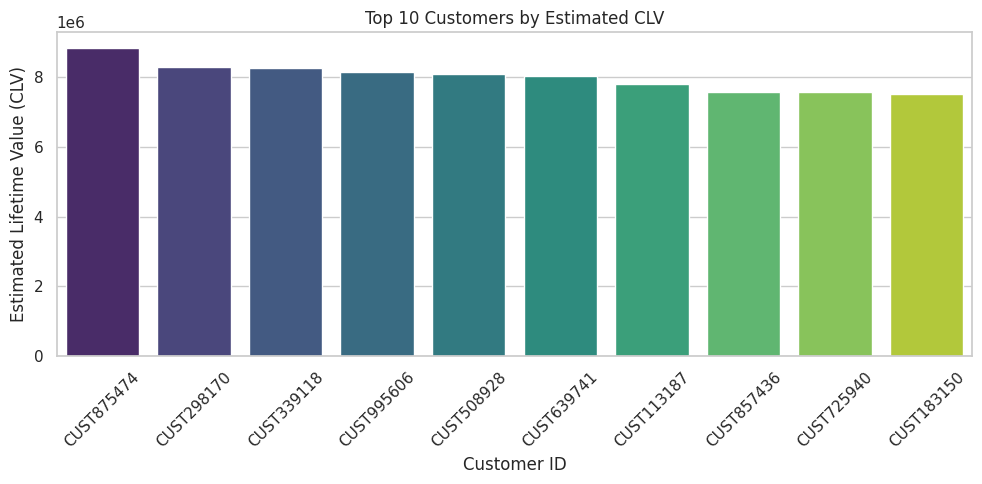

/tmp/ipython-input-1447100358.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_clv, x='cluster', y='CLV', palette='coolwarm')


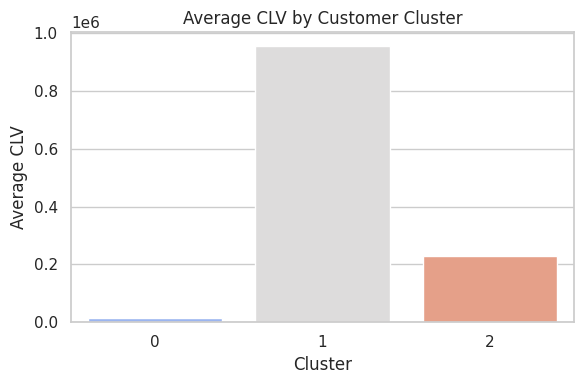


✅ CLV Prediction Complete. Visuals and data saved in /images folder.


In [ ]:
# ============================================================
# 🧩 CUSTOMER LIFETIME VALUE (CLV) PREDICTION
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure churn probabilities exist (from your Logistic Regression or XGBoost)
# Example: y_proba_lr from Logistic Regression or y_proba_xgb from XGBoost
# We'll use logistic regression probabilities as they’re interpretable

# Generate churn probabilities for the entire dataset using the trained LR model
X_all = rfm_pred[features] # Use the same features as the model was trained on
rfm_pred['Churn_Prob'] = lr.predict_proba(X_all)[:,1]
rfm_pred['Retention_Prob'] = 1 - rfm_pred['Churn_Prob']

# Compute basic CLV = Monetary * Retention Probability
rfm_pred['CLV'] = rfm_pred['Monetary'] * rfm_pred['Retention_Prob']

# Display sample
display(rfm_pred[[cust_col,'Monetary','Churn_Prob','Retention_Prob','CLV']].head(10))

# ============================================================
# 1️⃣ Top 10 High CLV Customers
# ============================================================
top_customers = rfm_pred.sort_values(by='CLV', ascending=False).head(10)
display(top_customers[[cust_col,'Monetary','Retention_Prob','CLV']])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x=cust_col, y='CLV', palette='viridis')
plt.title("Top 10 Customers by Estimated CLV")
plt.ylabel("Estimated Lifetime Value (CLV)")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/top10_clv_customers.png", dpi=150)
plt.show()

# ============================================================
# 2️⃣ Average CLV by Customer Cluster
# ============================================================
cluster_clv = rfm_pred.groupby('cluster')['CLV'].mean().reset_index().sort_values(by='CLV', ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(data=cluster_clv, x='cluster', y='CLV', palette='coolwarm')
plt.title("Average CLV by Customer Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average CLV")
plt.tight_layout()
plt.savefig("images/cluster_wise_clv.png", dpi=150)
plt.show()

# ============================================================
# 3️⃣ Save results
# ============================================================
rfm_pred[[cust_col,'Monetary','Churn_Prob','Retention_Prob','CLV','cluster']].to_csv("images/customer_clv_results.csv", index=False)

print("\n✅ CLV Prediction Complete. Visuals and data saved in /images folder.")

In [ ]:
import pandas as pd

# 1. Load the 'images/customer_clv_results.csv' file into a pandas DataFrame
clv_results_df = pd.read_csv('images/customer_clv_results.csv')

# 2. Display the first 10 rows of the clv_results_df DataFrame
print("First 10 rows of CLV Prediction Results:")
display(clv_results_df.head(10))

First 10 rows of CLV Prediction Results:


,customer_id,Monetary,Churn_Prob,Retention_Prob,CLV,cluster
0,CUST100002,629493.81,0.999504,0.000496,3.120411e+02,2
1,CUST100003,186212.68,0.940439,0.059561,1.109097e+04,0
2,CUST100005,867376.96,0.870865,0.129135,1.120085e+05,2
3,CUST100006,512410.96,0.999181,0.000819,4.198678e+02,0
4,CUST100007,1274059.70,0.999784,0.000216,2.750041e+02,2
5,CUST100008,1167318.99,0.010375,0.989625,1.155208e+06,1
6,CUST100010,831664.54,0.950332,0.049668,4.130725e+04,0
7,CUST100011,1481910.68,0.999911,0.000089,1.314357e+02,2
8,CUST100012,1875033.56,0.994968,0.005032,9.435913e+03,0
9,CUST100013,3283750.16,0.615099,0.384901,1.263919e+06,1


/tmp/ipython-input-577338533.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key=date_col, freq='M'))['TotalAmount'].sum().reset_index()


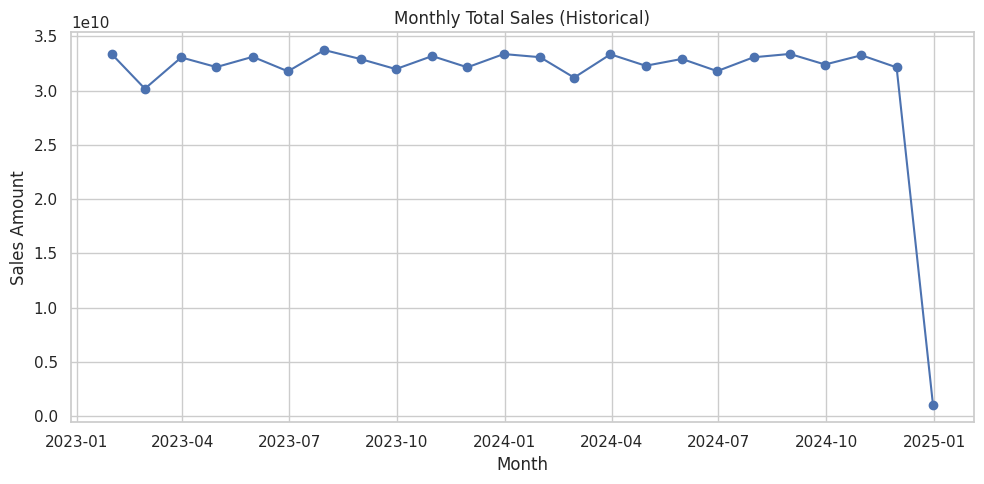

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

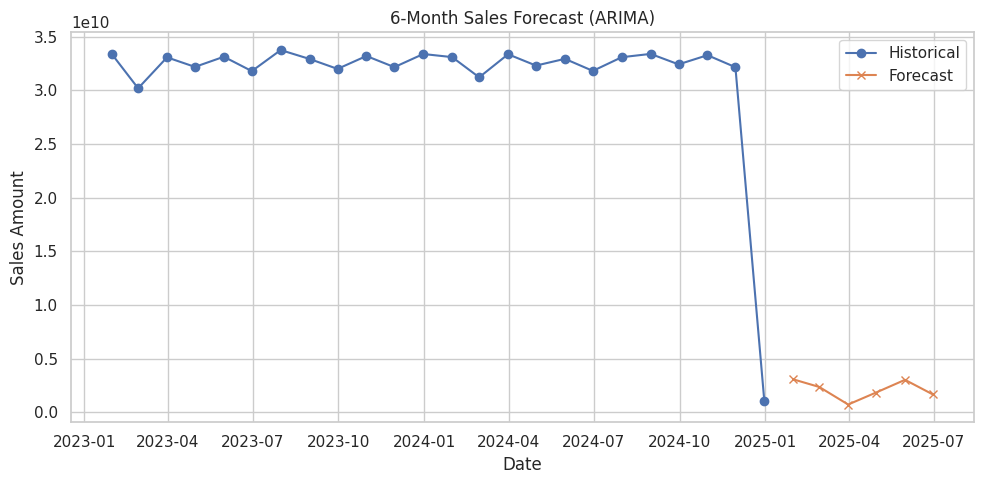


✅ Time-Series Sales Forecasting Complete. Forecast and charts saved in /images folder.


In [ ]:
# ============================================================
# 📈 TIME SERIES SALES FORECASTING
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure your dataset (df) has the correct date and amount columns
# Use the column names detected earlier in the notebook, e.g., 'purchase_date', 'quantity', 'unit_price_ngn'
# You might need to adjust these if your dataframe has different column names.
date_col = 'purchase_date' # Replace with your actual date column name
quantity_col = 'quantity' # Replace with your actual quantity column name
price_col = 'unit_price_ngn' # Replace with your actual price column name

# Convert date column to datetime and calculate TotalAmount if it doesn't exist
df[date_col] = pd.to_datetime(df[date_col])
if 'TotalAmount' not in df.columns:
    df['TotalAmount'] = df[quantity_col] * df[price_col]


# Aggregate monthly sales
monthly_sales = df.groupby(pd.Grouper(key=date_col, freq='M'))['TotalAmount'].sum().reset_index()
monthly_sales = monthly_sales.set_index(date_col)

# Plot historical sales
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['TotalAmount'], marker='o')
plt.title("Monthly Total Sales (Historical)")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/historical_monthly_sales.png", dpi=150)
plt.show()

# ============================================================
# 1️⃣ Fit ARIMA Model
# ============================================================
# Check for sufficient data points for ARIMA
if len(monthly_sales) < 2:
    print("Not enough data points (months) for ARIMA forecasting.")
else:
    try:
        # ARIMA order (p, d, q) - you might need to tune these based on your data
        # Example order: (2,1,2)
        model = ARIMA(monthly_sales['TotalAmount'], order=(2,1,2))
        model_fit = model.fit()

        # Forecast next 6 months
        forecast_steps = 6
        forecast = model_fit.forecast(steps=forecast_steps)

        # Create forecast dates
        # Ensure the frequency is 'M' for monthly data
        # Start from the month after the last data point
        future_dates = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(),
                                     periods=forecast_steps, freq='M')
        forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast_Sales': forecast})

        # ============================================================
        # 2️⃣ Plot Forecast vs Actual
        # ============================================================
        plt.figure(figsize=(10,5))
        plt.plot(monthly_sales.index, monthly_sales['TotalAmount'], label='Historical', marker='o')
        plt.plot(forecast_df['Date'], forecast_df['Forecast_Sales'], label='Forecast', marker='x')
        plt.title("6-Month Sales Forecast (ARIMA)")
        plt.xlabel("Date")
        plt.ylabel("Sales Amount")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("images/sales_forecast_arima.png", dpi=150)
        plt.show()

        # Save forecast data
        forecast_df.to_csv("images/sales_forecast.csv", index=False)

        print("\n✅ Time-Series Sales Forecasting Complete. Forecast and charts saved in /images folder.")

    except Exception as e:
        print(f"An error occurred during ARIMA modeling or forecasting: {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# You can now navigate to your Google Drive and find the 'images' folder in 'drive/MyDrive/images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

source_folder = "images"
destination_folder = "/content/drive/MyDrive/images"

# Create the destination folder in Google Drive if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move the contents of the source_folder to the destination_folder
# If the destination folder already exists, shutil.move will move the source_folder into it.
# To move contents, we iterate and move each item.
for item in os.listdir(source_folder):
    s = os.path.join(source_folder, item)
    d = os.path.join(destination_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True) # use copytree for directories
    else:
        shutil.copy2(s, d) # use copy2 to preserve metadata

print(f"All files and folders from '{source_folder}' moved to '{destination_folder}'")


All files and folders from 'images' moved to '/content/drive/MyDrive/images'
